<a href="https://colab.research.google.com/github/MehrdadDastouri/sine_wave_regression/blob/main/sine_wave_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [100/1000], Loss: 0.0617
Epoch [200/1000], Loss: 0.0464
Epoch [300/1000], Loss: 0.0409
Epoch [400/1000], Loss: 0.0146
Epoch [500/1000], Loss: 0.0037
Epoch [600/1000], Loss: 0.0015
Epoch [700/1000], Loss: 0.0007
Epoch [800/1000], Loss: 0.0003
Epoch [900/1000], Loss: 0.0002
Epoch [1000/1000], Loss: 0.0001


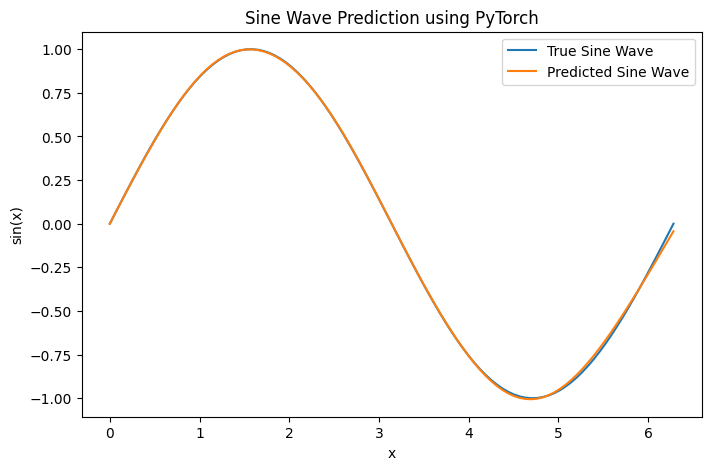

In [2]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic sine wave data
x = torch.linspace(0, 2 * np.pi, 100).reshape(-1, 1)  # Inputs (100 points between 0 and 2π)
y = torch.sin(x)  # Outputs (sin of inputs)

# Define the neural network model
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer with 10 neurons
        self.output = nn.Linear(10, 1)  # Output layer with 1 neuron
        self.activation = nn.Tanh()  # Tanh activation function

    def forward(self, x):
        x = self.activation(self.hidden(x))  # Hidden layer + activation
        x = self.output(x)  # Output layer (no activation for regression)
        return x

# Initialize the model
model = SineNet()

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

# Training the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass: predict outputs
    y_pred = model(x)
    # Compute the loss
    loss = criterion(y_pred, y)
    # Update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    y_pred = model(x)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), y.numpy(), label='True Sine Wave')  # True sine wave
plt.plot(x.numpy(), y_pred.numpy(), label='Predicted Sine Wave')  # Predicted sine wave
plt.legend()
plt.title("Sine Wave Prediction using PyTorch")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()